# MVP Engenharia de Dados

**Nome:** Gabriel Lopes Ursulino

**Matrícula:** 4052025000406

**Dataset:** [Cerebral Stroke Prediction-Imbalanced Dataset](https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/data)


## 1. Objetivo

O Acidente Vascular Cerebral (AVC), também conhecido pelo termo em inglês *stroke*, é uma das principais causas de morte e invalidez no mundo. O AVC acontece quando vasos que levam sangue ao cérebro entopem ou se rompem, provocando a paralisia da área cerebral que ficou sem circulação sanguínea. O AVC pode ser hemorrágico, quando há rompimento de um vaso cerebral, provocando hemorragia, ou isquêmico, quando há obstrução de uma artéria, impedindo a passagem de oxigênio para células cerebrais, que acabam morrendo. Essa obstrução pode acontecer devido a um trombo (trombose) ou a um êmbolo (embolia).

O **objetivo deste MVP** é identificar quais fatores clínicos e demográficos estão mais fortemente associados à ocorrência de um AVC. Compreender esses padrões pode auxiliar em campanhas de prevenção direcionadas e triagem médica.

### Perguntas a serem respondidas:

- Qual é a relação entre a idade e a ocorrência de AVC?
- Genero influencia na ocorrência de AVC?
- O tipo de trabalho e o tipo de residência (Urbana/Rural) influenciam no risco?
- Pacientes com histórico de hipertensão ou doença cardíaca têm uma taxa significativamente maior de AVC?
- Níveis elevados de glicose média estão correlacionados com casos de AVC?
- O IMC (Índice de Massa Corporal) tem correlação direta?
- Status de tabagismo influencia na ocorrência de avcs?

## 2. Coleta e conjunto de dados
O conjunto de dados escolhido é o *Cerebral Stroke Prediction-Imbalanced Dataset*, um arquivo CSV contendo dados históricos de pacientes e seus estados de saúde. Este é um conjunto de dados multivariado que reúne diversas características que podem estar associadas ao risco de AVC, como idade, hábitos, estilo de vida e condições prévias de saúde como hipertensão e doenças cardiovasculares. O dataset apresentado é público, amplamente disponível no Kaggle e seu uso é para fins didáticos. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

Todas as respostas para os problemas apresentados estão contidas em uma única tabela, não sendo necessário o relacionamento com outras tabelas.

*Para mais detalhes a respeito deste dataset, acesse:* https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/data

## 3. Modelagem e Catálogo de Dados
Para este projeto, será utilizada a Arquitetura Medallion (Bronze, Silver, Gold).

Bronze: Cópia fiel dos dados CSV em formato Delta.

Silver: Dados limpos, tipados e com valores nulos tratados.

Gold: Tabela analítica pronta para BI, modelada em formato "Flat" para facilitar a análise direta, dado o escopo do MVP.

**Catálogo de Dados**

| Coluna | Tipo | Descrição | Domínio/Valores Esperados |
| :--- | :--- | :--- | :--- |
| `id` | Numérico | Identificador único | 1 a 72943 |
| `gender` | Categórico | Gênero do paciente | Male, Female, Other |
| `age` | Numérico | Idade do paciente em anos | 0.0 a 82.0 |
| `hypertension` | Binário | 0: Não tem, 1: Tem hipertensão | 0, 1 |
| `heart_disease` | Binário | 0: Não tem, 1: Tem doença cardíaca | 0, 1 |
| `ever_married` | Categórico | Já foi casado? | No, Yes |
| `work_type` | Categórico | Tipo de trabalho | Private, Self-employed, Govt_job, children, Never_worked |
| `Residence_type` | Categórico | Tipo de residência | Urban, Rural |
| `avg_glucose_level` | Numérico | Nível médio de glicose no sangue | 55.0 a 291.05 |
| `bmi` | Numérico | Índice de Massa Corporal | 10.1 a 97.6 (Contém Nulos) |
| `smoking_status` | Categórico | Status de fumante | formerly smoked, never smoked, smokes, Unknown (Nulos) |
| `stroke` | Binário | **Variável Alvo**: 0: Sem AVC, 1: Teve AVC | 0, 1 |

## 4. Desenvolvimento

### 4.1 Configuração e Inicialização do Ambiente

Esta etapa atua como o script de configuração inicial do ambiente, sendo fundamental para garantir a governança e a organização correta MVP. Ela é importante porque materializa fisicamente a Arquitetura Medallion no Databricks, criando os recipientes lógicos isolados (Schemas Bronze, Silver e Gold) para cada etapa do processamento, ao mesmo tempo que assegura a reprodutibilidade do projeto ao limpar resquícios de testes anteriores, oferecendo um "terreno limpo" e estruturado para a execução segura dos pipelines de dados.

In [0]:
%sql
DROP CATALOG IF EXISTS mvpengenharia CASCADE

In [0]:
%sql
CREATE CATALOG mvpengenharia

In [0]:
%sql
USE CATALOG mvpengenharia

In [0]:
%sql
DROP SCHEMA IF EXISTS bronze CASCADE

In [0]:
%sql
CREATE SCHEMA bronze

In [0]:
%sql
DROP SCHEMA IF EXISTS silver CASCADE

In [0]:
%sql
CREATE SCHEMA silver

In [0]:
%sql
DROP SCHEMA IF EXISTS gold CASCADE

In [0]:
%sql
CREATE SCHEMA gold

### 4.2 Implementação da Camada Bronze

Esta etapa é responsável pela Ingestão e Catalogação dos dados brutos. Seu objetivo principal é capturar os dados da fonte original e persistí-los no Data Lake em formato otimizado, sem aplicar transformações de negócio, garantindo uma cópia fiel do histórico (raw data).

In [0]:
# Lê e carrega o dataset na camada bronze
df = spark.read.table("workspace.default.stroke_dataset")
df.write.format("delta").mode("overwrite").saveAsTable("mvpengenharia.bronze.stroke_dataset_bronze")

display(df.limit(10))

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,null,0
30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,null,0
56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,null,0
32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,null,0
52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


Os dados foram lidos de sua origem temporária **(workspace.default.stroke_dataset)** e gravados na tabela definitiva da camada Bronze **(mvpengenharia.bronze.stroke_dataset_bronze)**.

In [0]:
%sql
-- Verificação de Desbalanceamento de Classes
SELECT 
  stroke,
  count(*) as total_pacientes,
  round(count(*) * 100.0 / sum(count(*)) over(), 2) as porcentagem
FROM mvpengenharia.bronze.stroke_dataset_bronze
GROUP BY stroke
ORDER BY stroke;

stroke,total_pacientes,porcentagem
0,42617,98.20
1,783,1.80


Com esse código podemos inferir que se trata de um dataset extremamente desbalanceado em termos de classes (98,20% contra 1,80%).

In [0]:
%sql
-- Query para identificar IDs duplicados
SELECT 
    id, 
    count(*) as repeticoes
FROM mvpengenharia.bronze.stroke_dataset_bronze
GROUP BY id
HAVING count(*) > 1
ORDER BY repeticoes DESC;

id,repeticoes


Foi executada uma consulta SQL para verificar a existência de registros duplicados através da coluna id. Esta etapa serve como um profiling inicial para orientar as estratégias de limpeza necessárias na próxima camada (Silver). Como o código não retornou nenhuma linha, fica claro que não há registros duplicados na tabela.

In [0]:
%sql
-- Estatísticas Descritivas Básicas das variáveis númericas
SELECT 
  -- Estatísticas de Idade
  MIN(age) as min_age,
  ROUND(AVG(age), 2) as avg_age,
  MAX(age) as max_age,
  
  -- Estatísticas de Glicose
  MIN(avg_glucose_level) as min_glucose,
  ROUND(AVG(avg_glucose_level), 2) as avg_glucose,
  MAX(avg_glucose_level) as max_glucose,
  
  -- Estatísticas de IMC (BMI)
  MIN(bmi) as min_bmi,
  ROUND(AVG(bmi), 2) as avg_bmi,
  MAX(bmi) as max_bmi

FROM mvpengenharia.bronze.stroke_dataset_bronze;

min_age,avg_age,max_age,min_glucose,avg_glucose,max_glucose,min_bmi,avg_bmi,max_bmi
0.08,42.22,82.0,55.0,104.48,291.05,10.1,28.61,97.6


Este resumo nos indica que, na média, é uma população com idade de 42 anos e pré-diabética, de acordo com a *American Diabetes Association* e  outras diversas fontes.

***bmi*** (IMC): Trata-se de uma população que, em média, está com sobrepeso. Na mínima vou assumir que é uma pessoa com desnutrição e a máxima que trata-se de uma pessoa com obesidade mórbida.

***age*** (Idade): Temos uma ampla faixa de idade, indo desde bebês até idosos. Ótimo para analisarmos como AVC se distribui por idade.

[Clique aqui para conferir o diagnóstico de diabetes.](https://diabetes.org/about-diabetes/diagnosis#:~:text=Understanding%20Diabetes%20Diagnosis%20*%20Diabetes%20is%20diagnosed,greater%20than%20or%20equal%20to%20200%20mg/dl.)

[Clique aqui para conferir a tabela do IMC.](https://www.gov.br/conitec/pt-br/midias/protocolos/resumidos/PCDTResumidodeSobrepesoObesidade.pdf.pdf)

In [0]:
# Definindo o nome da tabela
table_name = "mvpengenharia.bronze.stroke_dataset_bronze"

# Comentário na Tabela
spark.sql(f"""
  COMMENT ON TABLE {table_name} IS 
  'Tabela da camada Bronze contendo dados brutos sobre ocorrências de AVC (Stroke), incluindo dados demográficos, clínicos e de estilo de vida dos pacientes.'
""")

DataFrame[]

In [0]:
# Definição das Colunas e Descrições
columns_descriptions = [
    ("id", "Identificador único do paciente"),
    ("gender", "Gênero do paciente (Male, Female, Other)"),
    ("age", "Idade do paciente"),
    ("hypertension", "Indicador de hipertensão (0: Não, 1: Sim)"),
    ("heart_disease", "Indicador de doença cardíaca (0: Não, 1: Sim)"),
    ("ever_married", "Indica se o paciente já foi casado (Yes/No)"),
    ("work_type", "Tipo de trabalho (ex: Private, Self-employed, Govt_job)"),
    ("Residence_type", "Tipo de residência (Rural, Urban)"),
    ("avg_glucose_level", "Nível médio de glicose no sangue"),
    ("bmi", "Índice de Massa Corporal (Body Mass Index)"),
    ("smoking_status", "Status de tabagismo (ex: never smoked, smokes)"),
    ("stroke", "Variável alvo: 1 se o paciente teve AVC, 0 caso contrário"),
]

# Loop para aplicar os comentários nas colunas
for col_name, comment in columns_descriptions:
    try:
        spark.sql(f"COMMENT ON COLUMN {table_name}.{col_name} IS '{comment}'")
        print(f"Comentário adicionado na coluna: {col_name}")
    except Exception as e:
        print(f"Erro ao comentar na coluna {col_name}: {e}")

Comentário adicionado na coluna: id
Comentário adicionado na coluna: gender
Comentário adicionado na coluna: age
Comentário adicionado na coluna: hypertension
Comentário adicionado na coluna: heart_disease
Comentário adicionado na coluna: ever_married
Comentário adicionado na coluna: work_type
Comentário adicionado na coluna: Residence_type
Comentário adicionado na coluna: avg_glucose_level
Comentário adicionado na coluna: bmi
Comentário adicionado na coluna: smoking_status
Comentário adicionado na coluna: stroke


Na célula acima foi implementada a documentação do Catálogo de Dados. Foram inseridos metadados descritivos na tabela e em cada uma de suas colunas. Isso assegura que o significado técnico e de negócio de cada atributo esteja disponível para qualquer usuário.

**Evidência da execução dos códigos e da persistência do arquivo em nuvem.**

![](https://github.com/gabrielursulino/ciencia-de-dados-e-analytics/blob/main/MVP/3.%20egenharia-de-dados/evidencias/06persist_bronze.png?raw=true)


### 4.3 Implementação da Camada Silver

Esta etapa executa o processo de transformação dos dados brutos em dados confiáveis (Trusted Data). O objetivo central é tratar problemas de qualidade identificados, padronizar tipos de dados e aplicar regras de negócio preliminares para preparar o dataset para análise.

In [0]:
%sql
-- Verificação de Nulos em todas as colunas
SELECT 
    COUNT(*) as total_registros,
    
    -- Contagem de Nulos por Coluna
    SUM(CASE WHEN id IS NULL THEN 1 ELSE 0 END) as id_nulos,
    SUM(CASE WHEN gender IS NULL THEN 1 ELSE 0 END) as gender_nulos,
    SUM(CASE WHEN age IS NULL THEN 1 ELSE 0 END) as age_nulos,
    SUM(CASE WHEN hypertension IS NULL THEN 1 ELSE 0 END) as hypertension_nulos,
    SUM(CASE WHEN heart_disease IS NULL THEN 1 ELSE 0 END) as heart_disease_nulos,
    SUM(CASE WHEN ever_married IS NULL THEN 1 ELSE 0 END) as ever_married_nulos,
    SUM(CASE WHEN work_type IS NULL THEN 1 ELSE 0 END) as work_type_nulos,
    SUM(CASE WHEN Residence_type IS NULL THEN 1 ELSE 0 END) as residence_type_nulos,
    SUM(CASE WHEN avg_glucose_level IS NULL THEN 1 ELSE 0 END) as glucose_nulos,
    SUM(CASE WHEN bmi IS NULL THEN 1 ELSE 0 END) as bmi_nulos,
    SUM(CASE WHEN smoking_status IS NULL THEN 1 ELSE 0 END) as smoking_nulos,
    SUM(CASE WHEN stroke IS NULL THEN 1 ELSE 0 END) as stroke_nulos

FROM mvpengenharia.bronze.stroke_dataset_bronze;

total_registros,id_nulos,gender_nulos,age_nulos,hypertension_nulos,heart_disease_nulos,ever_married_nulos,work_type_nulos,residence_type_nulos,glucose_nulos,bmi_nulos,smoking_nulos,stroke_nulos
43400,0,0,0,0,0,0,0,0,0,1462,13292,0


In [0]:
%sql
-- Diagnóstico de Qualidade (Data Profiling)
SELECT 
  COUNT(*) as total_registros,
  ROUND(SUM(CASE WHEN bmi IS NULL THEN 1 ELSE 0 END) * 100 / COUNT(*), 2) as bmi_pct_nulos,
  ROUND(SUM(CASE WHEN smoking_status IS NULL THEN 1 ELSE 0 END) * 100 / COUNT(*), 2) as smoking_pct_nulos
FROM mvpengenharia.bronze.stroke_dataset_bronze;

total_registros,bmi_pct_nulos,smoking_pct_nulos
43400,3.37,30.63


Acima foi realizada uma inspeção quantitativa via SQL para identificar o volume de dados ausentes (nulls) nas colunas bmi e smoking_status. Podemos ver que a coluna ***bmi*** possui 3,37% de valores ausentes, quanto ***smoking_status*** 30,63%, o que é um valor consideravelmente alto.

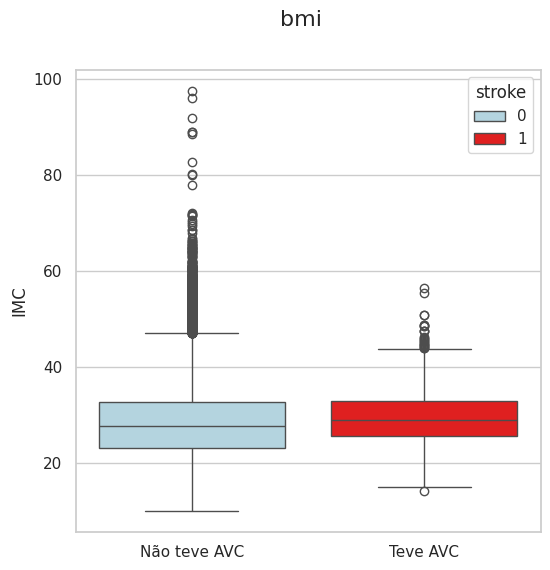

In [0]:
%python
import matplotlib.pyplot as plt
import seaborn as sns

# Ler os dados da camada Bronze
df_bronze_pd = spark.table(
    "mvpengenharia.bronze.stroke_dataset_bronze"
).select(
    "bmi", "stroke"
).toPandas()

# Confirguração e título
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.suptitle('bmi', fontsize=16)

# Boxplot bmi (IMC)
sns.boxplot(
    ax=ax,
    x="stroke",
    y="bmi",
    hue="stroke",
    data=df_bronze_pd,
    palette={0: 'lightblue', 1: 'red'}
)
ax.set_xlabel('')
ax.set_ylabel('IMC')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não teve AVC', 'Teve AVC'])

plt.show()

A análise do boxplot de ***bmi*** revelou a presença de muitos outliers. A estratégia de imputação escolhida será preencher estes valores ausentes com a mediana, por ser uma medida mais robusta a valores extremos e, portanto, a mais indicada para não distorcer a distribuição original dos dados.

A coluna smoking_status apresentou uma quantidade massiva de linhas vazias, correspondendo a mais de 30% do dataset. Diante de um volume tão grande, a imputação com a moda foi descartada por introduzir um viés significativo nos dados. A exclusão das linhas acarretaria em uma grande perda de informação e a exclusão da coluna também não foi considerada, pois ela será utilizada para análise.

Logo, a decisão estratégica será imputar os valores vazios desta coluna com uma nova categoria: _**'unknown'**_. Essa abordagem tem a dupla vantagem de preservar todas as instâncias do dataset e, ao mesmo tempo, transformar a falta de informação em uma feature que contribuirá para análise final.

Abaixo será executado um comando para inputação da mediana para o **_bmi_** e a criação da categoria **_"Unknown"_** para _smoking_status_, preservando a integridade volumétrica da base. Também serão removidas as colunas de baixa relevância analítica (id, ever_married) e ocorrerá o ajuste da tipagem dos dados de idade para inteiro, truncando decimais, que são irrelevantes para o escopo.

Nas colunas restantes da nova tabela as descrições foram reaplicadas no Catálogo de Dados, garantindo que as regras de negócio aplicadas ficassem transparentes para os usuários finais.

In [0]:
%sql
CREATE OR REPLACE TABLE mvpengenharia.silver.stroke_dataset_silver
USING DELTA
COMMENT 'Camada Silver: Dados limpos, tipados e com nulos tratados via inputação. Colunas ID e Ever_Married removidas conforme premissas de negócio.'
AS
SELECT
  gender,
  cast(age as INT) as age, --Idades fracionadas foram truncadas pois a granularidade de meses não impacta a análise de AVC neste escopo
  -- cast(age as DOUBLE) as age,
  cast(hypertension as INT) as hypertension,
  cast(heart_disease as INT) as heart_disease,
  work_type,
  Residence_type,
  cast(avg_glucose_level as DOUBLE) as avg_glucose_level,
  
  -- Inputação do BMI pela Mediana
  COALESCE(bmi, (
      SELECT percentile_approx(bmi, 0.5) 
      FROM mvpengenharia.bronze.stroke_dataset_bronze
  )) as bmi,
  
  -- Inputação de Categoria Desconhecida em smoking_status
  COALESCE(smoking_status, 'Unknown') as smoking_status,
  
  cast(stroke as INT) as stroke,

  -- Linhagem
  current_timestamp() as silver_ingestion_date

FROM mvpengenharia.bronze.stroke_dataset_bronze;

-- Reaplicando as descrições nas colunas que restaram
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN gender COMMENT 'Gênero do paciente';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN age COMMENT 'Idade do paciente';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN hypertension COMMENT '0: Não hipertenso, 1: Hipertenso';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN heart_disease COMMENT '0: Sem doença cardíaca, 1: Com doença cardíaca';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN work_type COMMENT 'Categoria de tipo de trabalho';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN Residence_type COMMENT 'Tipo de residência (Rural/Urbana)';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN avg_glucose_level COMMENT 'Nível médio de glicose sanguínea';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN bmi COMMENT 'Índice de Massa Corporal (Nulos preenchidos com a Mediana)';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN smoking_status COMMENT 'Status de tabagismo (Nulos preenchidos como Unknown)';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN stroke COMMENT 'Target: 1 = AVC, 0 = Sem AVC';
ALTER TABLE mvpengenharia.silver.stroke_dataset_silver ALTER COLUMN silver_ingestion_date COMMENT 'Data de processamento da camada Silver';

In [0]:
%sql
-- Validação de Sanidade (Sanity Check)
SELECT 
  -- Deve retornar 0
  SUM(CASE WHEN bmi IS NULL THEN 1 ELSE 0 END) as check_nulos_bmi,
  -- Deve retornar 0
  SUM(CASE WHEN smoking_status IS NULL THEN 1 ELSE 0 END) as check_nulos_smoking,
  -- Verifica se existem valores impossíveis (ex: idade ou glicose negativa)
  MIN(age) as idade_minima,
  MIN(avg_glucose_level) as glicose_minima,
  -- Confirma o total de linhas final
  COUNT(*) as total_registros
FROM mvpengenharia.silver.stroke_dataset_silver;

check_nulos_bmi,check_nulos_smoking,idade_minima,glicose_minima,total_registros
0,0,0,55.0,43400


Por fim, o código acima executa um Sanity Check para confirmar matematicamente a eliminação de valores nulos e verificar a consistência dos dados, assegurando que a camada Silver está pronta para alimentar a camada Gold.

In [0]:
%sql
SELECT * FROM mvpengenharia.silver.stroke_dataset_silver 
LIMIT 15;

gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,silver_ingestion_date
Male,3,0,0,children,Rural,95.12,18.0,Unknown,0,2025-12-19T00:33:47.021Z
Male,58,1,0,Private,Urban,87.96,39.2,never smoked,0,2025-12-19T00:33:47.021Z
Female,8,0,0,Private,Urban,110.89,17.6,Unknown,0,2025-12-19T00:33:47.021Z
Female,70,0,0,Private,Rural,69.04,35.9,formerly smoked,0,2025-12-19T00:33:47.021Z
Male,14,0,0,Never_worked,Rural,161.28,19.1,Unknown,0,2025-12-19T00:33:47.021Z
Female,47,0,0,Private,Urban,210.95,50.1,Unknown,0,2025-12-19T00:33:47.021Z
Female,52,0,0,Private,Urban,77.59,17.7,formerly smoked,0,2025-12-19T00:33:47.021Z
Female,75,0,1,Self-employed,Rural,243.53,27.0,never smoked,0,2025-12-19T00:33:47.021Z
Female,32,0,0,Private,Rural,77.67,32.3,smokes,0,2025-12-19T00:33:47.021Z
Female,74,1,0,Self-employed,Urban,205.84,54.6,never smoked,0,2025-12-19T00:33:47.021Z


Acima a tabela final da camada silver.

**Evidência da execução dos códigos e da persistência do arquivo em nuvem.**

![](https://github.com/gabrielursulino/ciencia-de-dados-e-analytics/blob/main/MVP/3.%20egenharia-de-dados/evidencias/07persist_silver.png?raw=true)

### 4.4 Implementação da Camada Gold

Esta é a etapa final do pipeline de Engenharia de Dados, onde os dados técnicos tratados na camada Silver são transformados em Informação de Negócio. O objetivo desta camada é facilitar o consumo por analistas e ferramentas de visualização, pré-calculando métricas e aplicando regras de negócio específicas.

A partir da tabela limpa da Silver, foi criada a tabela analítica stroke_analytics_gold aplicando-se a Modelagem Dimensional para transformar variáveis contínuas em categorias de negócio, facilitando a análise visual. Exemplos incluem:

**Agrupamento Etário:** Conversão da idade numérica em faixas (Criança, Jovem, Meia Idade, Idoso).

**Classificação Clínica:** Segmentação de pacientes baseada em padrões médicos para Glicose (Diabetes, Pré-diabetes) e IMC (Obesidade, Sobrepeso).

**Perfil de Risco Combinado:** Criação de uma variável sintética que identifica pacientes de "Alto Risco" (possuem hipertensão e/ou doença cardíaca), permitindo análises de correlação multivariada.

In [0]:
%sql
-- Criação da Tabela Gold (Analítica Completa)
CREATE OR REPLACE TABLE mvpengenharia.gold.stroke_analytics_gold
USING DELTA
COMMENT 'Camada Gold: Tabela analítica consolidada. Contém métricas numéricas para correlação e dimensões categóricas para perfis de risco.'
AS
SELECT
  -- DADOS ORIGINAIS (Para Correlações e Estatísticas) ---
  gender,
  age,                
  hypertension,       
  heart_disease,      
  work_type,          
  Residence_type,     
  avg_glucose_level,  
  bmi,                
  smoking_status,     
  stroke,             
  
  -- ENRIQUECIMENTO
  
  -- Faixas Etárias
  CASE 
    WHEN age < 18 THEN '0-17 (Criança/Adolescente)'
    WHEN age BETWEEN 18 AND 39 THEN '18-39 (Jovem Adulto)'
    WHEN age BETWEEN 40 AND 59 THEN '40-59 (Meia Idade)'
    WHEN age >= 60 THEN '60+ (Idoso)'
    ELSE 'Desconhecido'
  END as faixa_etaria,

  -- Classificação de Glicose
  CASE 
    WHEN avg_glucose_level <= 99 THEN 'Normal'
    WHEN avg_glucose_level BETWEEN 100 AND 125 THEN 'Pré-Diabetes'
    WHEN avg_glucose_level > 125 THEN 'Diabetes'
    ELSE 'Desconhecido' 
  END as categoria_glicose,

  -- Classificação de IMC
  CASE 
    WHEN bmi < 18.5 THEN 'Abaixo do Peso'
    WHEN bmi BETWEEN 18.5 AND 24.9 THEN 'Peso Normal'
    WHEN bmi BETWEEN 25 AND 29.9 THEN 'Sobrepeso'
    WHEN bmi >= 30 THEN 'Obesidade'
    ELSE 'Desconhecido'
  END as categoria_imc,

  -- Perfil Combinado (Risco Cardíaco)
  CASE 
    WHEN hypertension = 1 AND heart_disease = 1 THEN 'Altíssimo Risco (Ambos)'
    WHEN hypertension = 1 OR heart_disease = 1 THEN 'Alto Risco (Um dos dois)'
    ELSE 'Baixo Risco (Nenhum)'
  END as perfil_clinico,
  
  -- Auxiliar para contagem
  1 as contador_pacientes,
  current_timestamp() as gold_ingestion_date

FROM mvpengenharia.silver.stroke_dataset_silver;

num_affected_rows,num_inserted_rows


Abaixo é executada a documentação do Catálogo de Dados. Diferente das camadas anteriores, as descrições aqui focam na Regra de Negócio (ex: explicar que a categoria "Diabetes" considera glicose > 125), garantindo que os consumidores dos dados compreendam o significado analítico de cada coluna sem precisar ler o código.

In [0]:
%sql
-- Documentação e Descrições (Data Catalog)
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN gender COMMENT 'Gênero do paciente';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN age COMMENT 'Idade numérica';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN work_type COMMENT 'Tipo de vínculo trabalhista';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN Residence_type COMMENT 'Local de residência (Rural/Urbano)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN avg_glucose_level COMMENT 'Nível médio de glicose (Numérico)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN bmi COMMENT 'Índice de Massa Corporal (Númerico, Nulos preenchidos com a Mediana)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN smoking_status COMMENT 'Status de tabagismo (Nulos preenchidos como Unknown)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN stroke COMMENT 'Target: 1 = AVC, 0 = Não AVC';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN hypertension COMMENT 'Indicador binário de hipertensão (0=Não, 1=Sim)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN heart_disease COMMENT 'Indicador binário de doença cardíaca (0=Não, 1=Sim)';

-- Descrições das Colunas Calculadas (Business Rules)
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN faixa_etaria COMMENT 'Agrupamento: 0-17, 18-39, 40-59, 60+';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN categoria_glicose COMMENT 'Classificação: Normal, Pré-Diabetes, Diabetes (>125)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN categoria_imc COMMENT 'Classificação: Abaixo, Normal, Sobrepeso, Obesidade (>=30)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN perfil_clinico COMMENT 'Risco Combinado: Verifica se possui Hipertensão OU Doença Cardíaca';

-- Metadados
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN contador_pacientes COMMENT 'Auxiliar para contagens (Valor fixo 1)';
ALTER TABLE mvpengenharia.gold.stroke_analytics_gold ALTER COLUMN gold_ingestion_date COMMENT 'Data de processamento da camada Gold';

Serão executadas consultas de validação agrupando os dados pelas novas dimensões criadas. Isso servirá para confirmar a consistência das regras de negócio (ex: verificar se os grupos de "Alto Risco" realmente apresentam taxas maiores de AVC) e assegurar que a tabela final está pronta para responder às perguntas de negócio definidas no objetivo do projeto.

Validação dos Fatores Fisiológicos (Idade, Glicose e IMC)
Adicionada a categoria_imc na query original. Isso mostra, por exemplo, se existem muitos "Idosos" com "Obesidade" e "Diabetes" que tiveram AVC.

In [0]:
%sql
SELECT 
  faixa_etaria,
  categoria_glicose,
  categoria_imc, -- Nova classificação que criada
  count(*) as total_pacientes,
  sum(stroke) as total_avc,
  -- Calcula a taxa % de AVC nesse grupo
  round((sum(stroke) / count(*)) * 100, 2) as taxa_avc_percentual
FROM mvpengenharia.gold.stroke_analytics_gold
GROUP BY 1, 2, 3
ORDER BY 1, 2, 3;

faixa_etaria,categoria_glicose,categoria_imc,total_pacientes,total_avc,taxa_avc_percentual
0-17 (Criança/Adolescente),Desconhecido,Abaixo do Peso,43,0,0.0
0-17 (Criança/Adolescente),Desconhecido,Obesidade,13,0,0.0
0-17 (Criança/Adolescente),Desconhecido,Peso Normal,56,0,0.0
0-17 (Criança/Adolescente),Desconhecido,Sobrepeso,11,0,0.0
0-17 (Criança/Adolescente),Diabetes,Abaixo do Peso,243,0,0.0
0-17 (Criança/Adolescente),Diabetes,Obesidade,46,0,0.0
0-17 (Criança/Adolescente),Diabetes,Peso Normal,294,0,0.0
0-17 (Criança/Adolescente),Diabetes,Sobrepeso,83,0,0.0
0-17 (Criança/Adolescente),Normal,Abaixo do Peso,1935,0,0.0
0-17 (Criança/Adolescente),Normal,Obesidade,371,1,0.27


Validação dos Fatores de Comportamento e Histórico

Esta é uma consulta fundamental para validar as colunas adicionadas por último (smoking_status e perfil_clinico). Ela responde diretamente as perguntas sobre tabagismo e comorbidades.

In [0]:
%sql
SELECT 
  perfil_clinico, -- Alto Risco vs Baixo Risco
  smoking_status, -- Incluindo os Unknowns que tratamos
  count(*) as total_pacientes,
  sum(stroke) as total_avc,
  round((sum(stroke) / count(*)) * 100, 2) as taxa_avc_percentual
FROM mvpengenharia.gold.stroke_analytics_gold
GROUP BY 1, 2
ORDER BY taxa_avc_percentual DESC; -- Ordena do maior risco para o menor

perfil_clinico,smoking_status,total_pacientes,total_avc,taxa_avc_percentual
Altíssimo Risco (Ambos),Unknown,63,9,14.29
Altíssimo Risco (Ambos),never smoked,174,18,10.34
Altíssimo Risco (Ambos),smokes,120,11,9.17
Altíssimo Risco (Ambos),formerly smoked,158,14,8.86
Alto Risco (Um dos dois),formerly smoked,1375,86,6.25
Alto Risco (Um dos dois),smokes,923,48,5.2
Alto Risco (Um dos dois),Unknown,791,40,5.06
Alto Risco (Um dos dois),never smoked,2004,99,4.94
Baixo Risco (Nenhum),formerly smoked,5960,121,2.03
Baixo Risco (Nenhum),smokes,5519,74,1.34


Verificação da tabela final abaixo.

In [0]:
%sql
SELECT * FROM mvpengenharia.gold.stroke_analytics_gold 
LIMIT 15;

gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,faixa_etaria,categoria_glicose,categoria_imc,perfil_clinico,contador_pacientes,gold_ingestion_date
Male,3,0,0,children,Rural,95.12,18.0,Unknown,0,0-17 (Criança/Adolescente),Normal,Abaixo do Peso,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Male,58,1,0,Private,Urban,87.96,39.2,never smoked,0,40-59 (Meia Idade),Normal,Obesidade,Alto Risco (Um dos dois),1,2025-12-19T00:34:01.282Z
Female,8,0,0,Private,Urban,110.89,17.6,Unknown,0,0-17 (Criança/Adolescente),Pré-Diabetes,Abaixo do Peso,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,70,0,0,Private,Rural,69.04,35.9,formerly smoked,0,60+ (Idoso),Normal,Obesidade,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Male,14,0,0,Never_worked,Rural,161.28,19.1,Unknown,0,0-17 (Criança/Adolescente),Diabetes,Peso Normal,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,47,0,0,Private,Urban,210.95,50.1,Unknown,0,40-59 (Meia Idade),Diabetes,Obesidade,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,52,0,0,Private,Urban,77.59,17.7,formerly smoked,0,40-59 (Meia Idade),Normal,Abaixo do Peso,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,75,0,1,Self-employed,Rural,243.53,27.0,never smoked,0,60+ (Idoso),Diabetes,Sobrepeso,Alto Risco (Um dos dois),1,2025-12-19T00:34:01.282Z
Female,32,0,0,Private,Rural,77.67,32.3,smokes,0,18-39 (Jovem Adulto),Normal,Obesidade,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,74,1,0,Self-employed,Urban,205.84,54.6,never smoked,0,60+ (Idoso),Diabetes,Obesidade,Alto Risco (Um dos dois),1,2025-12-19T00:34:01.282Z


**Evidência da execução dos códigos e da persistência do arquivo em nuvem.**

![](https://github.com/gabrielursulino/ciencia-de-dados-e-analytics/blob/main/MVP/3.%20egenharia-de-dados/evidencias/08persist_gold.png?raw=true)

## 5. Análise de Dados e Solução do Problema

Esta é a etapa de Consumo de Dados e Visualização. O objetivo é explorar a tabela `gold.stroke_analytics_gold` utilizando bibliotecas Python pandas, matplotlib e seaborn para responder às perguntas de negócio definidas no início do projeto e identificar padrões de risco.

### 5.1 Avaliação da Qualidade dos Dados

O conjunto de dados é bem estruturado, sem registros duplicados, garantindo consistência e integridade ao longo do pipeline. Entretanto, foram identificadas lacunas em variáveis críticas, especialmente em BMI (IMC) e Smoking Status. Esses problemas foram tratados na camada Silver por meio de inputação da mediana para o IMC e pela criação da categoria _Unknown_ para o status de tabagismo, evitando perda significativa de registros.

O principal ponto de atenção do dataset é o alto desbalanceamento da variável alvo, com aproximadamente 98% de casos negativos e 2% positivos. Embora esse cenário reflita a realidade clínica, ele limita análises estatísticas simples e exige técnicas de reamostragem caso o dataset seja utilizado para modelagem preditiva.

A análise de outliers indicou valores extremos de glicose e IMC que, longe de representarem erros, são clinicamente possíveis, refletindo pacientes com comorbidades severas, e por isso foram mantidos.

De forma geral, o pipeline de engenharia foi eficaz em mitigar os problemas identificados, tornando o dataset confiável e adequado para consumo analítico.

### 5.2 Solução do problema

Nesta seção iremos responder as perguntas elencadas no ínicio do projeto. Para cada resposta obtida tecnicamente através da análise dos dados haverá uma discussão do seu resultado.

Ao final, haverá uma discussão de forma geral sobre a solução do problema a partir das discussões de cada resposta.

Primeiro, trazemos os dados da tabela Gold para a memória do Python (Pandas).


In [0]:
%python
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Configuração de Estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Carregar a tabela Gold para um DataFrame Pandas
# Como o dataset não é massivo (Gigabytes), o toPandas() é seguro e rápido.
df_gold = spark.table("mvpengenharia.gold.stroke_analytics_gold").toPandas()

# Verificando as colunas
print(f"Dados carregados: {df_gold.shape[0]} linhas e {df_gold.shape[1]} colunas.")
display(df_gold.head(10))

Dados carregados: 43400 linhas e 16 colunas.


gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,faixa_etaria,categoria_glicose,categoria_imc,perfil_clinico,contador_pacientes,gold_ingestion_date
Male,3,0,0,children,Rural,95.12,18.0,Unknown,0,0-17 (Criança/Adolescente),Normal,Abaixo do Peso,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Male,58,1,0,Private,Urban,87.96,39.2,never smoked,0,40-59 (Meia Idade),Normal,Obesidade,Alto Risco (Um dos dois),1,2025-12-19T00:34:01.282Z
Female,8,0,0,Private,Urban,110.89,17.6,Unknown,0,0-17 (Criança/Adolescente),Pré-Diabetes,Abaixo do Peso,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,70,0,0,Private,Rural,69.04,35.9,formerly smoked,0,60+ (Idoso),Normal,Obesidade,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Male,14,0,0,Never_worked,Rural,161.28,19.1,Unknown,0,0-17 (Criança/Adolescente),Diabetes,Peso Normal,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,47,0,0,Private,Urban,210.95,50.1,Unknown,0,40-59 (Meia Idade),Diabetes,Obesidade,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,52,0,0,Private,Urban,77.59,17.7,formerly smoked,0,40-59 (Meia Idade),Normal,Abaixo do Peso,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,75,0,1,Self-employed,Rural,243.53,27.0,never smoked,0,60+ (Idoso),Diabetes,Sobrepeso,Alto Risco (Um dos dois),1,2025-12-19T00:34:01.282Z
Female,32,0,0,Private,Rural,77.67,32.3,smokes,0,18-39 (Jovem Adulto),Normal,Obesidade,Baixo Risco (Nenhum),1,2025-12-19T00:34:01.282Z
Female,74,1,0,Self-employed,Urban,205.84,54.6,never smoked,0,60+ (Idoso),Diabetes,Obesidade,Alto Risco (Um dos dois),1,2025-12-19T00:34:01.282Z


### 5.2.1 Respondendo Perguntas Demográficas:

- Qual é a relação entre a idade e a ocorrência de AVC?
- O tipo de trabalho e o tipo de residência (Urbana/Rural) influenciam no risco?
- Genero influencia na ocorrência de AVC?

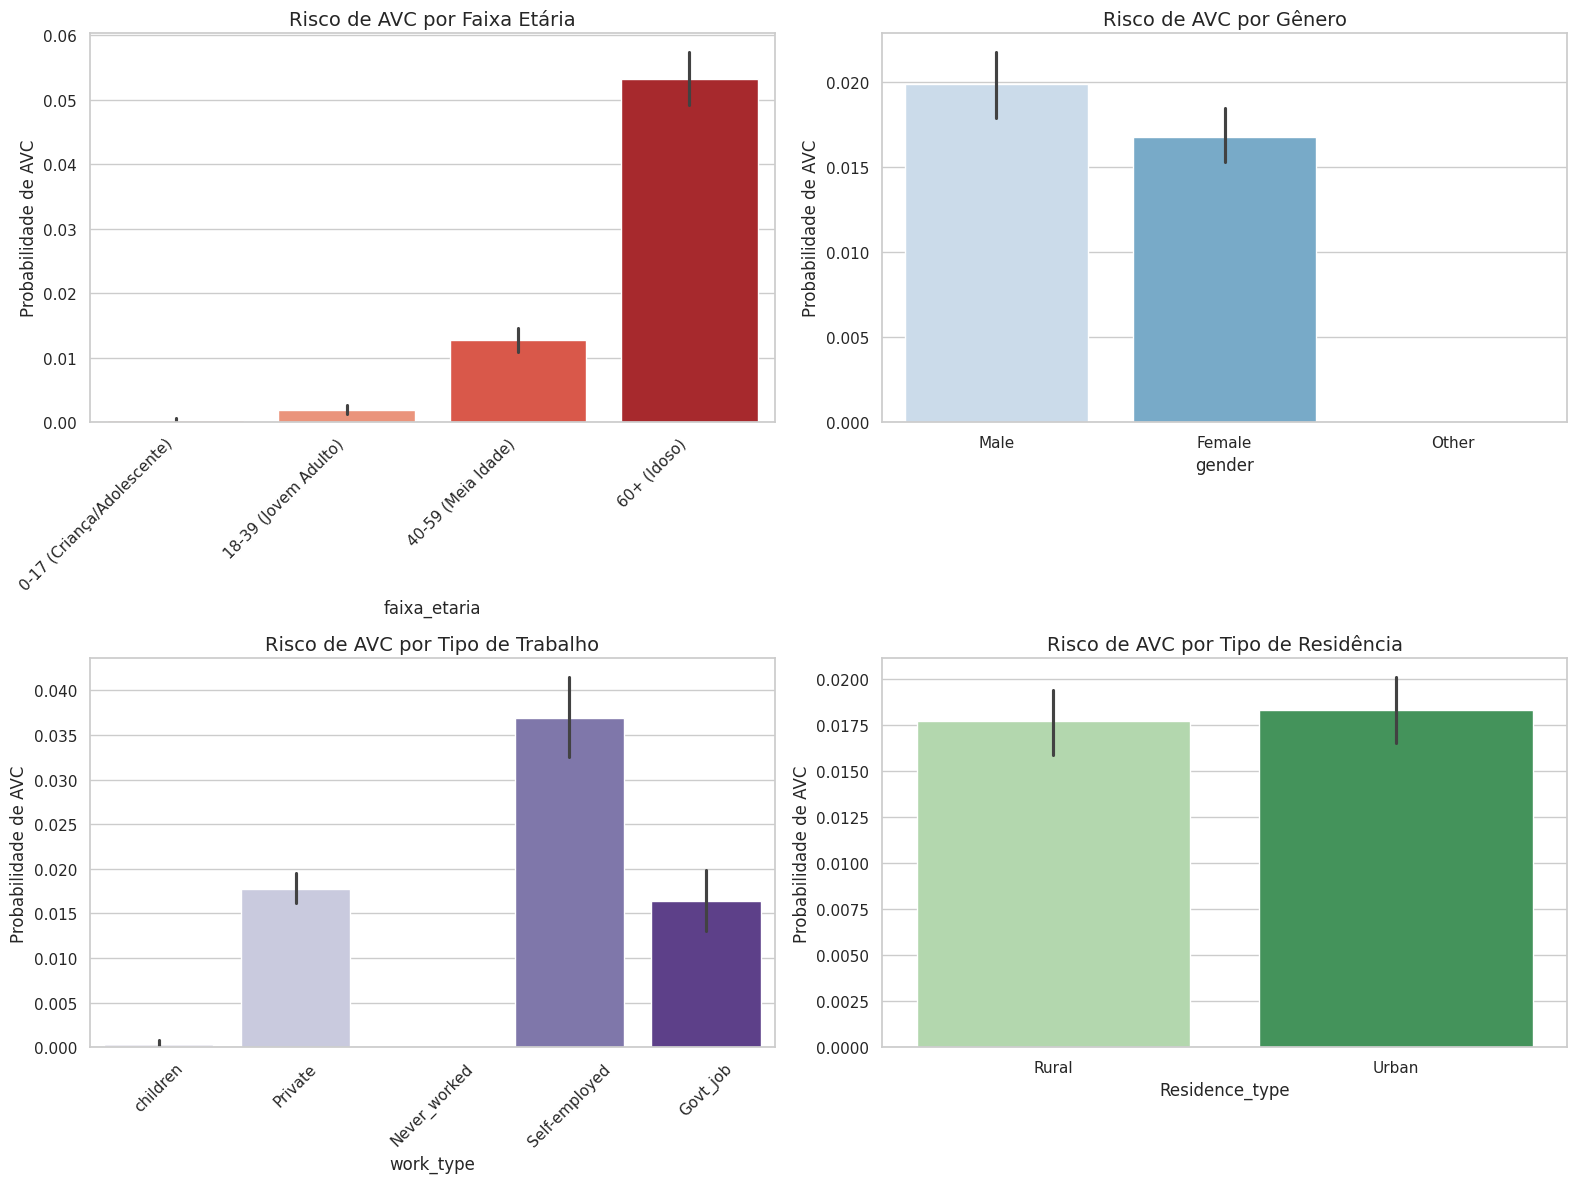

In [0]:
%python
# Criando uma figura com 4 subplots (2x2) para agrupar a análise demográfica
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Idade (Faixa Etária) vs AVC
# Correção: Adicionado hue='faixa_etaria' e legend=False
sns.barplot(data=df_gold.sort_values('faixa_etaria'), x='faixa_etaria', y='stroke', hue='faixa_etaria', legend=False, palette='Reds', ax=axs[0, 0])
axs[0, 0].set_title('Risco de AVC por Faixa Etária', fontsize=14)
axs[0, 0].set_ylabel('Probabilidade de AVC')
axs[0, 0].set_xticks(axs[0, 0].get_xticks()) 
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right')

# 2. Gênero vs AVC
# Correção: Adicionado hue='gender' e legend=False
sns.barplot(data=df_gold, x='gender', y='stroke', hue='gender', legend=False, palette='Blues', ax=axs[0, 1])
axs[0, 1].set_title('Risco de AVC por Gênero', fontsize=14)
axs[0, 1].set_ylabel('Probabilidade de AVC')

# 3. Tipo de Trabalho vs AVC
# Correção: Adicionado hue='work_type' e legend=False
sns.barplot(data=df_gold, x='work_type', y='stroke', hue='work_type', legend=False, palette='Purples', ax=axs[1, 0])
axs[1, 0].set_title('Risco de AVC por Tipo de Trabalho', fontsize=14)
axs[1, 0].set_ylabel('Probabilidade de AVC')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Tipo de Residência vs AVC
# Correção: Adicionado hue='Residence_type' e legend=False
sns.barplot(data=df_gold, x='Residence_type', y='stroke', hue='Residence_type', legend=False, palette='Greens', ax=axs[1, 1])
axs[1, 1].set_title('Risco de AVC por Tipo de Residência', fontsize=14)
axs[1, 1].set_ylabel('Probabilidade de AVC')

plt.tight_layout()
plt.show()

**Análise:** Observa-se visualmente que a idade é o fator preponderante. O tipo de trabalho 'Self-employed' apresenta maior risco, provavelmente correlacionado com a idade avançada desse grupo. A residência (Rural/Urbana) mostra pouca ou nenhuma variação significativa.

[Text(0, 0, 'Não teve AVC'), Text(1, 0, 'Teve AVC')]

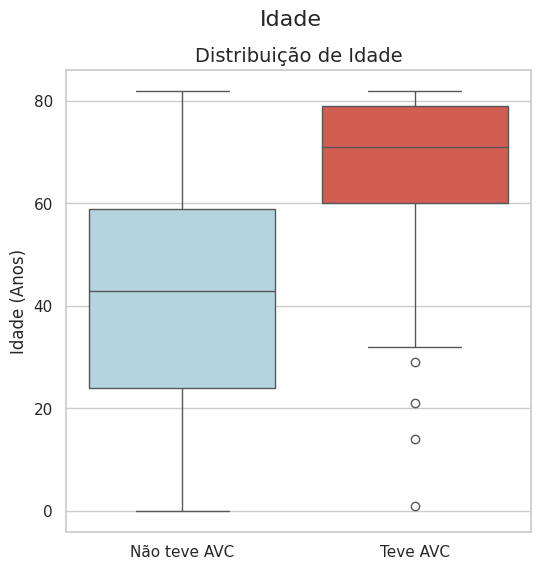

In [0]:
# Configuração e título
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.suptitle('Idade', fontsize=16)

# Boxplot: Idade (age)
sns.boxplot(ax=axes, data=df_gold,x='stroke', y='age', hue='stroke', palette={0: 'lightblue', 1: '#e74c3c'}, legend=False)
axes.set_title('Distribuição de Idade', fontsize=14)
axes.set_xlabel('')
axes.set_ylabel('Idade (Anos)')
axes.set_xticks([0, 1])
axes.set_xticklabels(['Não teve AVC', 'Teve AVC'])

**Boxplot Idade:** A diferença entre os dois grupos é muito alta. A caixa (representando o intervalo interquartil, ou seja, os 50% centrais dos dados) do grupo "Teve AVC" está quase inteiramente acima da caixa do grupo "Não teve AVC". A mediana da idade (a linha no meio da caixa) de quem teve um AVC está por volta dos 70 anos. A mediana da idade de quem não teve é muito menor, por volta dos 40-45 anos. A idade não é apenas um fator de risco, ela parece ser o fator preditivo mais forte entre os três. Uma pessoa que sofreu um AVC neste conjunto de dados é, tipicamente, mais velha. A separação entre as distribuições é muito clara.


**1. Qual é a relação entre a idade e a ocorrência de AVC?**

  A idade apresenta uma forte correlação positiva com a ocorrência de AVC. O risco é praticamente nulo em crianças e jovens, aumenta na meia-idade e se torna significativamente mais elevado em indivíduos com 60 anos ou mais, sendo o fator mais relevante do dataset.

**2. O tipo de trabalho e o tipo de residência (Urbana/Rural) influenciam no risco?**

  O tipo de trabalho apresenta influência moderada, com maior risco observado entre trabalhadores autônomos, provavelmente refletindo efeitos indiretos como idade, estresse e condições socioeconômicas. Já o tipo de residência (urbana ou rural) mostra impacto mínimo, com diferenças pouco significativas no risco de AVC.

**3. Gênero influencia na ocorrência de AVC?**

  Sim, há uma diferença leve entre os gêneros, com homens apresentando risco ligeiramente maior do que mulheres. No entanto, o impacto do gênero é secundário quando comparado à idade.

%md
### 5.2.2 Respondendo Perguntas Clínicas e de Estilo de Vida:

- Pacientes com histórico de hipertensão ou doença cardíaca têm uma taxa significativamente maior de AVC?
- Níveis elevados de glicose média estão correlacionados com casos de AVC?
- O IMC (Índice de Massa Corporal) tem correlação direta?
- Status de tabagismo influencia na ocorrência de avcs?

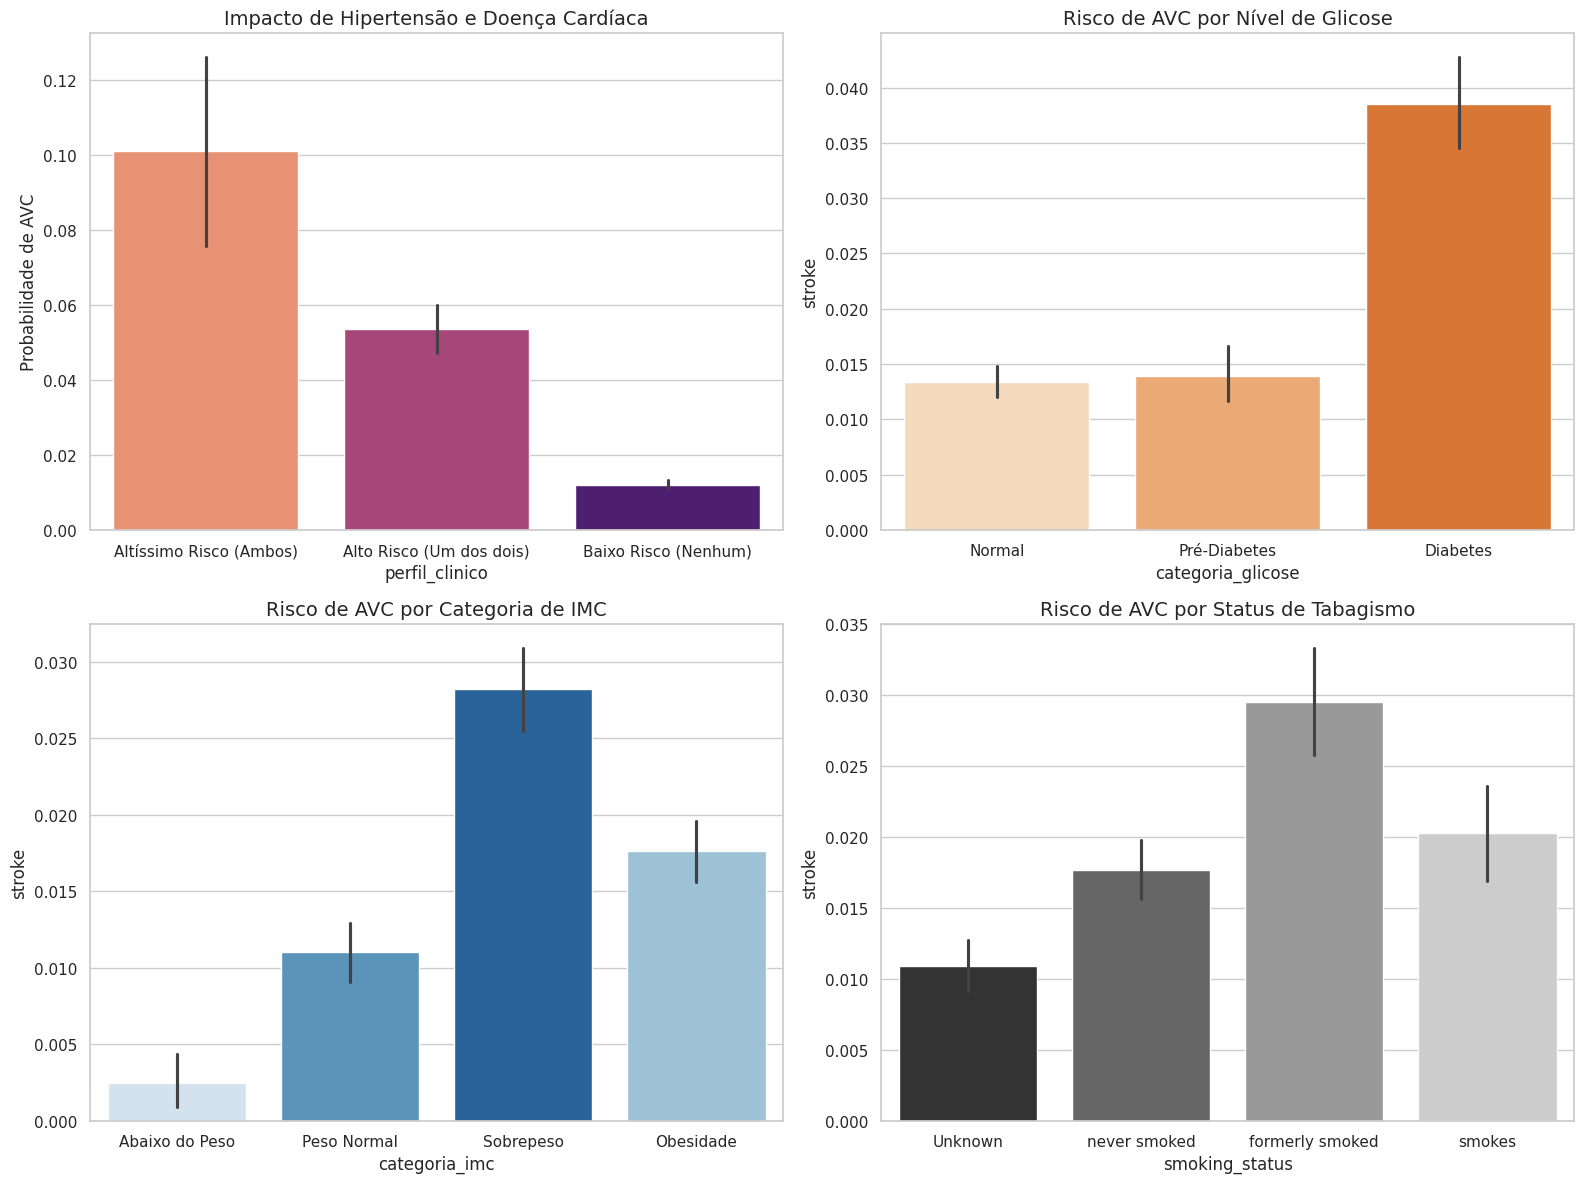

In [0]:
%python
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Perfil Clínico
order_risk = df_gold.groupby('perfil_clinico')['stroke'].mean().sort_values(ascending=False).index
sns.barplot(data=df_gold, x='perfil_clinico', y='stroke', hue='perfil_clinico', legend=False, order=order_risk, palette='magma', ax=axs[0, 0])
axs[0, 0].set_title('Impacto de Hipertensão e Doença Cardíaca', fontsize=14)
axs[0, 0].set_ylabel('Probabilidade de AVC')

# 2. Glicose
order_glucose = ['Normal', 'Pré-Diabetes', 'Diabetes']
sns.barplot(data=df_gold, x='categoria_glicose', y='stroke', hue='categoria_glicose', legend=False, order=order_glucose, palette='Oranges', ax=axs[0, 1])
axs[0, 1].set_title('Risco de AVC por Nível de Glicose', fontsize=14)

# 3. IMC
order_bmi = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obesidade']
sns.barplot(data=df_gold, x='categoria_imc', y='stroke', hue='categoria_imc', legend=False, order=order_bmi, palette='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Risco de AVC por Categoria de IMC', fontsize=14)

# 4. Tabagismo
sns.barplot(data=df_gold, x='smoking_status', y='stroke', hue='smoking_status', legend=False, palette='gray', ax=axs[1, 1])
axs[1, 1].set_title('Risco de AVC por Status de Tabagismo', fontsize=14)

plt.tight_layout()
plt.show()

**Análise:** Pacientes com histórico combinado (perfil clínico) apresentam taxa de AVC drasticamente superior. A Diabetes confirmada também eleva o risco. Curiosamente, ex-fumantes ('formerly smoked') podem apresentar taxas altas, possivelmente indicando cessação do hábito após problemas de saúde.

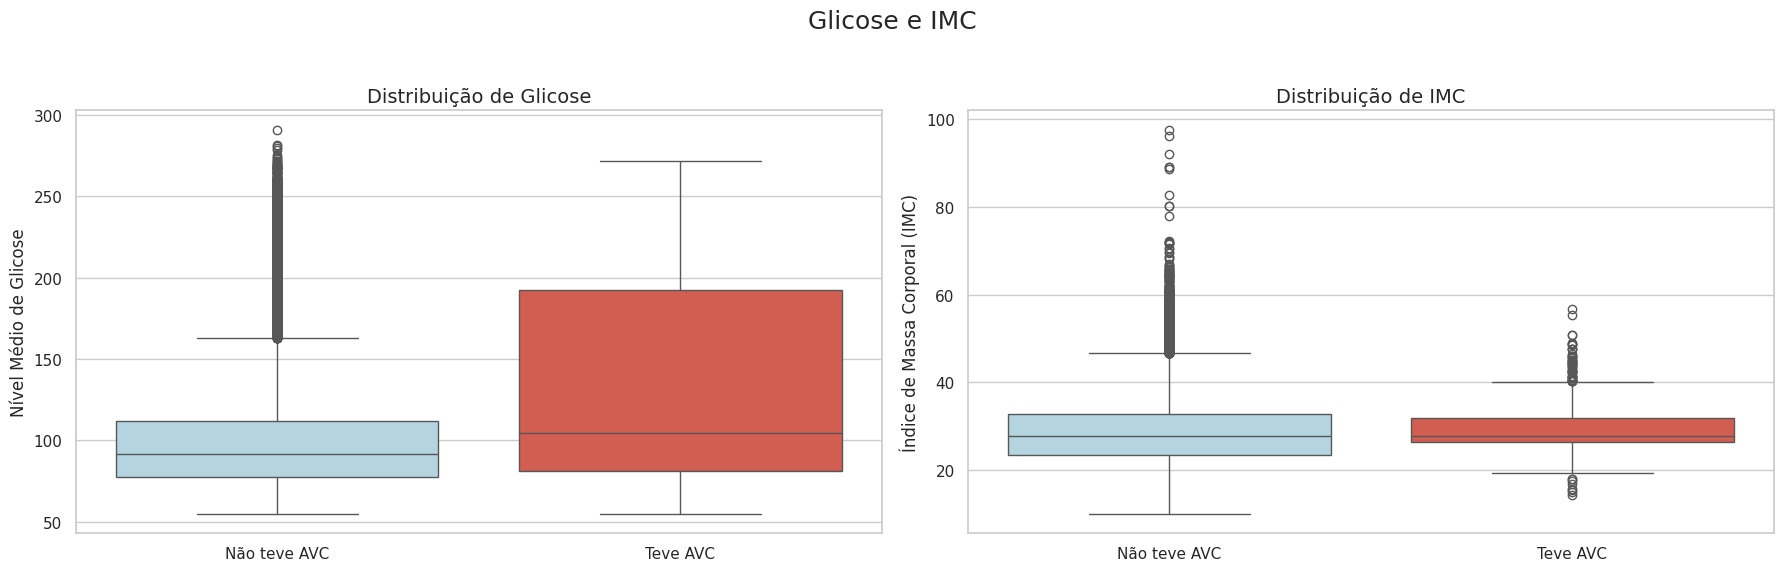

In [0]:
# Configuração e título
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plt.suptitle('Glicose e IMC',fontsize=18)

# Boxplot: Glicose (avg_glucose_level)
sns.boxplot(ax=axes[0], data=df_gold, x='stroke', y='avg_glucose_level', hue='stroke', palette={0: 'lightblue', 1: '#e74c3c'}, legend=False)
axes[0].set_title('Distribuição de Glicose', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Nível Médio de Glicose')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não teve AVC', 'Teve AVC'])

# Boxplot: IMC (bmi)
sns.boxplot(ax=axes[1], data=df_gold, x='stroke', y='bmi', hue='stroke', palette={0: 'lightblue', 1: '#e74c3c'}, legend=False)
axes[1].set_title('Distribuição de IMC', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('Índice de Massa Corporal (IMC)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não teve AVC', 'Teve AVC'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Nível de Glicose:** Assim como na idade, há uma separação muito significativa entre os dois grupos. A mediana do nível de glicose no grupo "Teve AVC" é um pouco mais alta (talvez em torno de 110), enquanto no grupo "Não teve AVC" a mediana está na faixa normal (em torno de 95-100). A caixa do grupo "Teve AVC" é também muito mais "alta" (maior variabilidade), indicando que os níveis de glicose entre os pacientes que sofreram AVC variam mais. Níveis elevados de glicose estão fortemente associados à ocorrência de AVC. A grande quantidade de outliers no grupo "Não teve AVC" mostra que existem pessoas com glicose alta que não tiveram AVC, mas a tendência central do grupo que sofreu um AVC é inegavelmente de hiperglicemia.

**IMC:** Aqui, a diferença é bem mais sutil. A mediana do IMC no grupo "Teve AVC" é ligeiramente maior do que no grupo "Não teve AVC" (algo como 30 vs. 28).
Há uma enorme sobreposição entre as duas caixas. Isso significa que muitas pessoas que não tiveram AVC possuem um IMC similar ou até maior do que muitas pessoas que tiveram.

**1. Pacientes com histórico de hipertensão ou doença cardíaca têm uma taxa significativamente maior de AVC?**

  Sim.
  Pacientes classificados como altíssimo risco (hipertensão e doença cardíaca) apresentam a maior probabilidade de AVC, muito superior aos demais grupos. Aqueles com apenas uma das condições também têm risco elevado, enquanto pacientes sem nenhuma das duas apresentam risco significativamente menor. Hipertensão e doença cardíaca são fortes fatores de risco, com efeito cumulativo.

**2. Níveis elevados de glicose média estão correlacionados com casos de AVC?**

  Sim.
  Observa-se um aumento claro do risco de AVC conforme a categoria de glicose avança de normal → pré-diabetes → diabetes. O boxplot reforça essa relação, mostrando níveis médios de glicose mais altos entre pacientes que tiveram AVC.

**3. O IMC (Índice de Massa Corporal) tem correlação direta?**

  Parcialmente.
  O risco de AVC aumenta do peso normal para sobrepeso, atingindo seu pico nessa categoria. Em obesidade, o risco permanece elevado, mas não supera o grupo de sobrepeso. Os boxplots indicam IMC médio ligeiramente maior em pacientes com AVC, porém com forte sobreposição entre grupos. Sozinho, o IMC não parece ser capaz de diferenciar bem os dois grupos. Isso sugere que, embora a obesidade seja um fator de risco conhecido, seu impacto pode ser menos direto ou pode ser mais relevante quando combinado com outros fatores (como hipertensão ou idade avançada), não sendo isoladamente determinante.

**4. Status de tabagismo influencia na ocorrência de AVC?**

  Sim, com ressalvas.
  Ex-fumantes apresentam o maior risco, seguidos por fumantes ativos. Indivíduos que nunca fumaram apresentam risco intermediário, enquanto a categoria Unknown tem o menor risco (possivelmente por viés de dados). O tabagismo influencia o risco de AVC, mas seus efeitos podem estar interligados à idade e comorbidades, exigindo análise multivariada.

### 5.3 Discussão final

Alcançamos nosso objetivo com este projeto ao implementar uma arquitetura de dados moderna que consolidou e saneou os registros clínicos, permitindo a identificação clara de perfis de risco associados ao Acidente Vascular Cerebral (AVC). As análises revelaram padrões contundentes, confirmando a idade avançada como o fator principal, mas destacando o papel crítico das comorbidades — especificamente a hipertensão e a doença cardíaca — como aceleradores drásticos da probabilidade de ocorrência do evento.

Também observamos comportamentos distintos em outras variáveis. Enquanto os níveis elevados de glicose apresentaram uma correlação direta com o aumento do risco, a análise do Índice de Massa Corporal (IMC) mostrou-se mais complexa, com distribuições sobrepostas entre os grupos, sugerindo que o peso isoladamente pode ser um preditor menos discriminante do que o quadro clínico geral.

Do ponto de vista da engenharia e qualidade dos dados, constatamos desafios técnicos importantes, como a necessidade de tratamento de dados ausentes (inputação) e, principalmente, o severo desbalanceamento das classes, onde cerca de 98% dos registros eram de casos negativos. Essa característica reforça a importância de métricas de avaliação cuidadosas e estratégias de reamostragem no caso de utilização de modelos preditivos de Machine Learning.

Essas informações estruturadas são essenciais para embasar estratégias de medicina preventiva e triagem clínica. O pipeline desenvolvido não apenas fornece um diagnóstico histórico, mas estabelece uma fundação confiável para monitorar pacientes de "Alto Risco" e atuar preventivamente antes que o desfecho clínico ocorra.

## 6. Autoavaliação

### 6.1 Atingimento dos Objetivos

O objetivo principal deste projeto foi a construção de um pipeline de Engenharia de Dados ponta a ponta (End-to-End) na nuvem utilizando a plataforma Databricks, abrangendo desde a ingestão até a análise exploratória dos fatores de risco para o Acidente Vascular Cerebral (AVC). Para isso, realizamos:

- A configuração do ambiente de dados com isolamento e governança, criando catálogos e esquemas específicos para organizar o fluxo de informações;

- A modelagem dos dados seguindo as melhores práticas da Arquitetura Medallion, estruturando as camadas Bronze (dados brutos), Silver (dados tratados e limpos) e Gold (dados enriquecidos com regras de negócio), devidamente documentadas no Catálogo de Dados;

- O processamento e transformação dos dados em formato Delta Lake, utilizando a performance do Apache Spark e a versatilidade da linguagem SQL para aplicar tratamentos de qualidade, como a inputação de valores nulos e padronização de tipos;

- A execução de análises exploratórias que responderam às perguntas de negócio elencadas no início do projeto. Através da união de consultas analíticas e visualizações gráficas com as bibliotecas Matplotlib e Seaborn, foi possível traçar o perfil clínico dos pacientes e identificar a correlação entre idade, comorbidades e o risco de AVC.

Dito isso, acredito que os objetivos delineados no início do projeto foram atingidos com sucesso. A solução entregue não apenas processou os dados com eficiência, mas transformou registros brutos em inteligência de negócio acionável. No entanto, algumas melhorias podem ser feitas para aumentar a robustez do modelo, especialmente em relação ao balanceamento das classes, conforme será explicitado na seção de "Trabalhos Futuros".

Por fim, posso dizer que este projeto proporcionou uma experiência prática enriquecedora com o uso do ecossistema Databricks, consolidando o aprendizado sobre a arquitetura Lakehouse, Data Quality e engenharia de features para dados de saúde.

### 6.2 Dificuldades Enfrentadas

As principais dificuldades do projeto concentraram-se nas etapas de saneamento e refinamento dos dados. Embora o dataset original fosse estruturado, apresentou problemas relevantes de completude, com valores ausentes em variáveis críticas como IMC e histórico de tabagismo, demandando estratégias de imputação estatística e categorização na camada Silver para evitar perda de registros.

Outro desafio importante foi o alto desbalanceamento da variável alvo, o que exigiu cautela na interpretação das análises para mitigar vieses. Adicionalmente, houve ajustes técnicos na camada de visualização, especialmente para garantir a legibilidade de gráficos com rótulos extensos.

De forma geral, essas dificuldades representam a complexidade natural de projetos de Engenharia de Dados, sendo etapas essenciais de tomada de decisão e maturação do pipeline, mais do que impedimentos ao sucesso do projeto.

### 6.3 Trabalhos Futuros

O projeto estabelece uma base sólida de engenharia e análise de dados, porém pode ser evoluído em quatro frentes principais. A primeira é o enriquecimento da base de dados, com a incorporação de novas fontes clínicas para reduzir o desbalanceamento da variável alvo e a integração de dados externos, como informações demográficas ou ambientais. A segunda envolve a orquestração e automação do pipeline, utilizando ferramentas como Databricks Workflows ou Airflow, permitindo ingestão contínua, execução sequencial das camadas e monitoramento de falhas.

Como evolução analítica, recomenda-se a construção de um dashboard interativo de Self-Service BI, conectando a camada Gold a ferramentas de visualização para facilitar análises dinâmicas por usuários de negócio. Por fim, o projeto pode avançar para modelos preditivos de Machine Learning, com treinamento de classificadores para estimar o risco de AVC, exigindo técnicas de reamostragem para mitigar o desbalanceamento de classes.